# Importing Libraries

In [1]:
#Importing libraries for our project
import pandas as pd
import numpy as np
from google.cloud import bigquery
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pywaffle import Waffle
#client = bigquery.Client()
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
print("It's done")

It's done


# Data Collection

In [2]:
data = pd.read_csv('cyclistic_data.csv')

# Data Wrangling

In [3]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,ride_length,month
0,AE2F1EF987F17A25,classic_bike,2022-01-03 16:52:00 UTC,2022-01-03 17:00:00 UTC,Milwaukee Ave & Wabansia Ave,13243,Damen Ave & Thomas St (Augusta Blvd),TA1307000070,41.912616,-87.681391,41.901315,-87.677409,member,2,8,1
1,8D1DC19ED5848507,electric_bike,2022-01-04 13:40:00 UTC,2022-01-04 14:05:00 UTC,Dearborn St & Adams St,TA1305000005,Clark St & Wrightwood Ave,TA1305000014,41.878990,-87.629114,41.929546,-87.643118,casual,3,25,1
2,8F10848233142DB1,classic_bike,2022-01-12 14:20:00 UTC,2022-01-12 14:26:00 UTC,Southport Ave & Waveland Ave,13235,Broadway & Waveland Ave,13325,41.948150,-87.663940,41.949074,-87.648636,member,4,6,1
3,B4C791F7B38D3EF7,classic_bike,2022-01-02 12:35:00 UTC,2022-01-02 13:15:00 UTC,Ritchie Ct & Banks St,KA1504000134,Rush St & Cedar St,KA1504000133,41.906866,-87.626217,41.902309,-87.627691,member,1,40,1
4,0AC961DAEBB4CD14,classic_bike,2022-01-17 21:35:00 UTC,2022-01-17 21:48:00 UTC,Broadway & Waveland Ave,13325,Racine Ave & Fullerton Ave,TA1306000026,41.949074,-87.648636,41.925563,-87.658404,member,2,13,1


In [4]:
#Checking data types to look for inconsitencies
data.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
day_of_week             int64
ride_length             int64
month                   int64
dtype: object

In [5]:
#Getting the statistical values 
data.describe()

,start_lat,start_lng,end_lat,end_lng,day_of_week,ride_length,month
count,5.901463e+06,5.901463e+06,5.895873e+06,5.895873e+06,5.901463e+06,5.901463e+06,5.901463e+06
mean,4.190077e+01,-8.764742e+01,4.190102e+01,-8.764761e+01,4.065831e+00,1.988998e+01,7.236964e+00
std,4.725668e-02,3.093877e-02,4.734863e-02,3.056536e-02,2.051117e+00,1.479859e+02,2.568967e+00
min,4.164000e+01,-8.784000e+01,4.139000e+01,-8.897000e+01,1.000000e+00,-1.380000e+02,1.000000e+00
25%,4.188103e+01,-8.766154e+01,4.188103e+01,-8.766241e+01,2.000000e+00,6.000000e+00,5.000000e+00
50%,4.189964e+01,-8.764335e+01,4.190000e+01,-8.764375e+01,4.000000e+00,1.100000e+01,7.000000e+00
75%,4.192957e+01,-8.762872e+01,4.192968e+01,-8.762911e+01,6.000000e+00,2.000000e+01,9.000000e+00
max,4.563503e+01,-7.379648e+01,4.237000e+01,-8.750000e+01,7.000000e+00,4.162900e+04,1.200000e+01


In [6]:
#Cheking look for null values
data.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    860786
start_station_id      860784
end_station_name      919896
end_station_id        919896
start_lat                  0
start_lng                  0
end_lat                 5590
end_lng                 5590
member_casual              0
day_of_week                0
ride_length                0
month                      0
dtype: int64

In [7]:
#Database features 
data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901463 entries, 0 to 5901462
Columns: 16 entries, ride_id to month
dtypes: float64(4), int64(3), object(9)
memory usage: 720.4+ MB


In [8]:
#Removing null values
df = data.dropna(inplace=False)

In [9]:
#Checking if the data is ready to analyse
df.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
day_of_week           0
ride_length           0
month                 0
dtype: int64

In [10]:
df.shape

(4629230, 16)

In [11]:
#Dropping unnecessary columns for analysis
df.drop(['start_lat', 'start_lng', 'end_lat', 'end_lng','start_station_id','end_station_id'], axis=1, inplace=True)
df.head()

C:\Users\jhose\anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,day_of_week,ride_length,month
0,AE2F1EF987F17A25,classic_bike,2022-01-03 16:52:00 UTC,2022-01-03 17:00:00 UTC,Milwaukee Ave & Wabansia Ave,Damen Ave & Thomas St (Augusta Blvd),member,2,8,1
1,8D1DC19ED5848507,electric_bike,2022-01-04 13:40:00 UTC,2022-01-04 14:05:00 UTC,Dearborn St & Adams St,Clark St & Wrightwood Ave,casual,3,25,1
2,8F10848233142DB1,classic_bike,2022-01-12 14:20:00 UTC,2022-01-12 14:26:00 UTC,Southport Ave & Waveland Ave,Broadway & Waveland Ave,member,4,6,1
3,B4C791F7B38D3EF7,classic_bike,2022-01-02 12:35:00 UTC,2022-01-02 13:15:00 UTC,Ritchie Ct & Banks St,Rush St & Cedar St,member,1,40,1
4,0AC961DAEBB4CD14,classic_bike,2022-01-17 21:35:00 UTC,2022-01-17 21:48:00 UTC,Broadway & Waveland Ave,Racine Ave & Fullerton Ave,member,2,13,1


# EDA and Data Visualization

In [12]:
df.groupby(['day_of_week'])['member_casual'].value_counts(ascending=False)

day_of_week  member_casual
1            casual           380729
             member           328498
2            member           377494
             casual           229314
3            member           419981
             casual           204581
4            member           418796
             casual           210696
5            member           414455
             casual           237586
6            member           365123
             casual           263751
7            casual           422715
             member           355511
Name: member_casual, dtype: int64

In [21]:
rides = df.member_casual.value_counts()
total_rides = pd.DataFrame(data=rides)
total_rides

,member_casual
member,2679858
casual,1949372


In [14]:
area = df.groupby(['month'])['member_casual'].value_counts().unstack(-1)
#area_values = pd.DataFrame(data = area)
#area_values.rename(columns={'member_casual': 'value'})
#areas = pd.get_dummies(area_values, prefix=['member_casual'])
area

member_casual,casual,member
month,,
1,12605,67523
2,15144,74034
3,67156,148827
4,91897,180663
5,220246,282299
6,292068,328282
7,311678,331002
8,341476,332933
9,292931,328219


In [15]:
#total_riders = user_type.reset_index()
#total = total_riders.rename(columns={"index": "member_type", "member_casual": "amount"})
#total

In [16]:
monthly_rides = df['month'].value_counts().reset_index()
monthly_rides

,index,month
0,8,674409
1,7,642680
2,9,621150
3,6,620350
4,5,502545
5,10,477972
6,4,272560
7,11,255904
8,3,215983
9,12,176371


In [17]:
monthly = monthly_rides.set_index('index').sort_index(ascending=True)
monthly

,month
index,
1,80128
2,89178
3,215983
4,272560
5,502545
6,620350
7,642680
8,674409
9,621150


In [18]:
average = df.groupby(['member_casual'])['ride_length'].mean().reset_index()
average

,member_casual,ride_length
0,casual,26.621724
1,member,12.600589


In [19]:
df['length'] = df['ride_length'].abs()

C:\Users\jhose\AppData\Local\Temp/ipykernel_2128/4233557307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length'] = df['ride_length'].abs()


In [20]:
ride_length = df.groupby(['day_of_week','member_casual'])['ride_length'].mean()
ride_length

day_of_week  member_casual
1            casual           30.621261
             member           14.340273
2            casual           27.663706
             member           12.216255
3            casual           23.200023
             member           11.751639
4            casual           22.807134
             member           11.888798
5            casual           23.410542
             member           12.063486
6            casual           24.661431
             member           12.254840
7            casual           29.039464
             member           14.223841
Name: ride_length, dtype: float64

In [21]:
df.start_station_name.head(10)

0    Milwaukee Ave & Wabansia Ave
1          Dearborn St & Adams St
2    Southport Ave & Waveland Ave
3           Ritchie Ct & Banks St
4         Broadway & Waveland Ave
5      Aberdeen St & Jackson Blvd
6      Fairbanks St & Superior St
7      Ashland Ave & Augusta Blvd
8       Clinton St & Roosevelt Rd
9         Logan Blvd & Elston Ave
Name: start_station_name, dtype: object

# Data Visualization

Text(0, 0.5, 'Rides Average")')

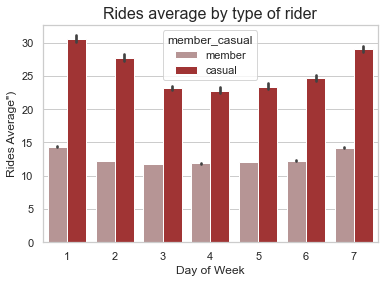

In [22]:
sns.set_theme(style="whitegrid")

sns.barplot(x='day_of_week', y='ride_length', hue='member_casual', data=df,
            palette=['rosybrown', 'firebrick'])

#add overall title
plt.title('Rides average by type of rider', fontsize=16)

#add axis titles
plt.xlabel('Day of Week')
plt.ylabel('Rides Average")')

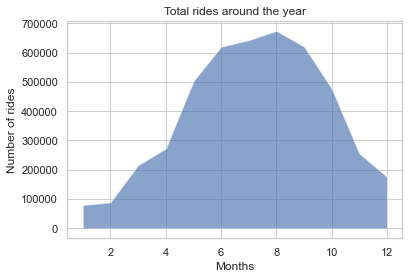

In [23]:
plt.fill_between(monthly.index, monthly.month, alpha=0.65)
plt.title('Total rides around the year')
plt.ylabel('Number of rides')
plt.xlabel('Months')
plt.show()

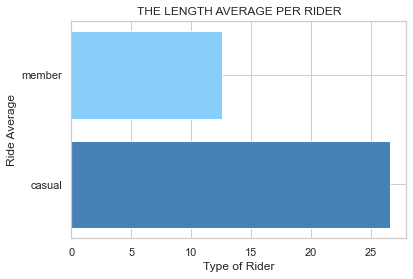

In [24]:
plt.barh(average.member_casual, average.ride_length, color=['steelblue','lightskyblue'],alpha=1)
plt.title('THE LENGTH AVERAGE PER RIDER')
plt.xlabel('Type of Rider')
plt.ylabel('Ride Average')
plt.show()

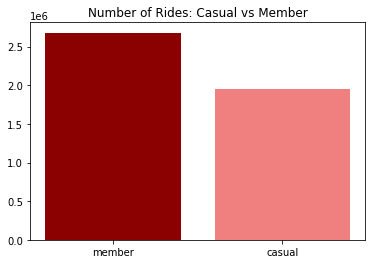

In [23]:
#user_rides.plot(kind='bar',alpha=0.6, rot=0, color=['darkred','lightcoral'])
plt.bar(total_rides.index, total_rides.member_casual, color=['darkred','lightcoral'])
plt.title('Number of Rides: Casual vs Member')
plt.show()

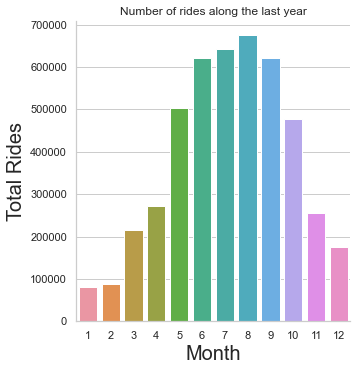

In [26]:
sns.catplot(x="index", y="month", kind="bar", data=monthly_rides)
plt.title('Number of rides along the last year')
plt.xlabel("Month",fontsize=20)
plt.ylabel("Total Rides",fontsize=20)
plt.show()

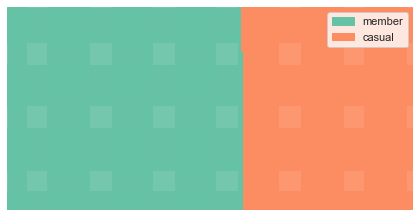

In [27]:
fig = plt.figure(
    FigureClass=Waffle, 
    columns=200,
    rows=100,
    values=list(rides.values),
    labels=list(rides.index)
)

<AxesSubplot:xlabel='month'>

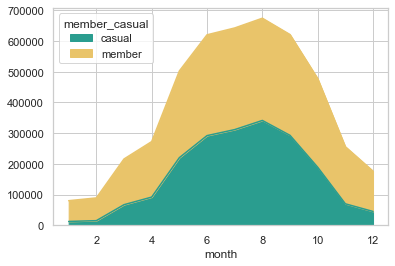

In [28]:
area.plot.area(color={'casual':'#2a9d8f', 'member':'#e9c46a'})

In [22]:
stopwords = set(STOPWORDS)

In [23]:
text = " ".join(review for review in df.start_station_name.astype(str))

In [24]:
print ("There are {} words in the combination of all cells in column YOUR_COLUMN_NAME.".format(len(text)))

There are 115233515 words in the combination of all cells in column YOUR_COLUMN_NAME.


In [32]:
stopwords.update(["bloom", "rose", "petals", "Average", "diameter","flushes", 'throughout', "Blooms", "form"])

In [33]:
#WorldClound().generate(text)

In [25]:
# instantiate a word cloud object
wordcloud = WordCloud(stopwords=stopwords, width=4000, height=2000).generate(text)

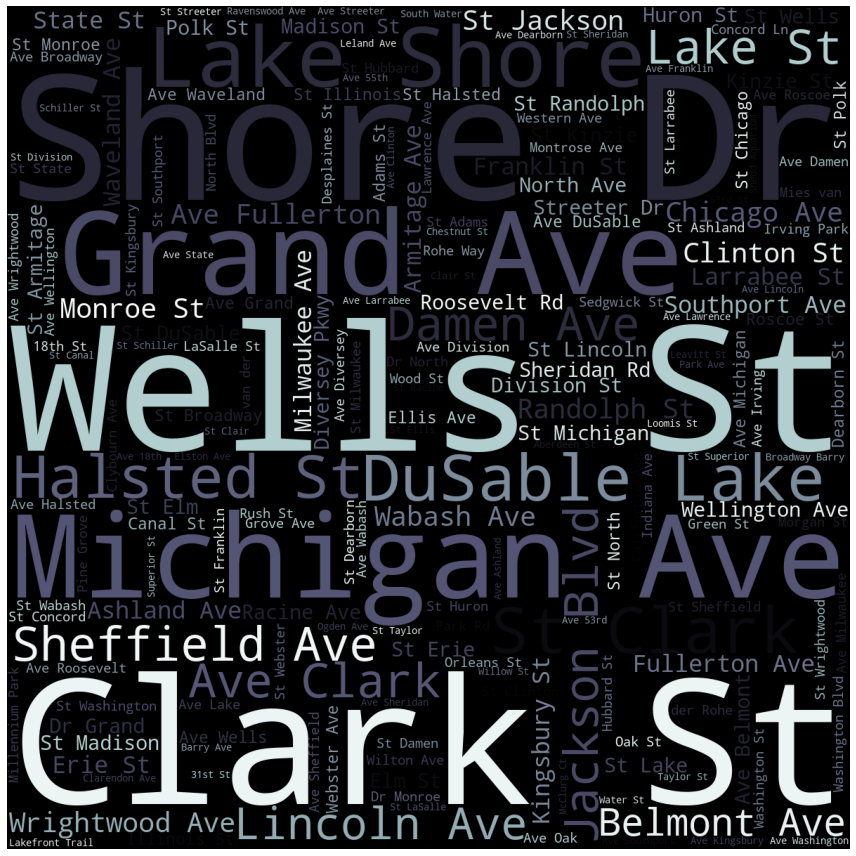

In [31]:
mask = np.array(Image.open('give-up.png'))
#  2.  generate WordCloud
wordcloud = WordCloud(width = 1200, height = 1200,  # resolution
                colormap = 'bone',                  # font colors from palette
                stopwords = stopwords,              # remove common words
                normalize_plurals = True,           # plurals to singular
                repeat = True,                      # repeat words
                min_font_size = 10).generate(text)


#  3.  plot WordCloud
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout()  # fillout figure size
plt.show()

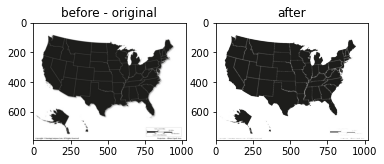

In [48]:
# a.  open and read image file
image_file = Image.open("USA.jpg")


# b. convert image file to RGBA values
image_rgba = image_file.convert("RGBA")
image_data = image_rgba.getdata()


# c. convert values above threshold to white, 255 (white background)
threshold = 150
new_image = []

for x in image_data:
    if x[0] > threshold:
        new_image.append((255,255,255,1))  # white
    else:
        new_image.append(x)

image_rgba.putdata(new_image)


#  d.  create MASK image with 'after' RGBA values
image_mask = np.array(image_rgba)


#  e.  plot before and after
plt.subplot(121)
plt.imshow(image_file)
plt.title('before - original')
plt.subplot(122)
plt.imshow(image_rgba)
plt.title('after')
plt.show()

In [58]:
mask2 = np.array(Image.open("USA.jpg"))
mask3 = np.where(mask2==0, 255, mask2)

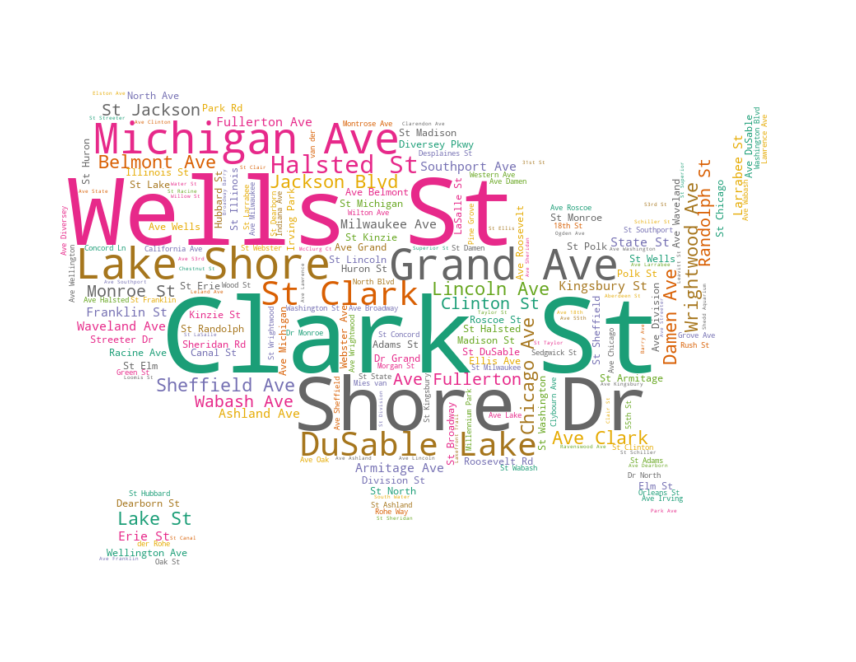

In [65]:
wordcloud = WordCloud(width = 1200, height = 1200,      # resolution
                colormap = 'Dark2',                    # font colors from palette
                background_color ='white',              # background color
                stopwords = stopwords,                  # remove common words
                normalize_plurals = True,               # plurals to singular
                repeat = True,                          # repeat words
                mask = mask3).generate(text)  # image MASK with white background


#  3.  plot WordCloud
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()  # fillout figure size
plt.show()